In [1]:
import pprint
import pandas as pd
from econ_utils import create_df, coinmarketcap_api
from constants import PALETTE
import squarify
import matplotlib.pyplot as plt
pp = pprint.PrettyPrinter(indent = 2)


In [2]:
response = coinmarketcap_api("cryptocurrency/listings/latest", 
  start=1,
  limit=1000,
  convert="USD"
)

In [3]:
df = pd.json_normalize(response["data"]).astype({"quote.USD.market_cap_dominance": "float"})
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9672,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.912232e+07,1.912232e+07,...,4.637195e+11,40.1327,5.092535e+11,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5988,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.219752e+08,1.219752e+08,...,2.336290e+11,20.2195,2.336290e+11,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,38153,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.741496e+10,6.915898e+10,...,6.743401e+10,5.8361,6.917852e+10,NaN,2022-08-15T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,5726,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.349147e+10,5.349147e+10,...,5.349483e+10,4.6297,5.349483e+10,NaN,2022-08-15T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,1067,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.613373e+08,1.613373e+08,...,5.161869e+10,4.4654,6.398856e+10,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN


In [4]:
df.nlargest(10, "quote.USD.market_cap_dominance")

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9672,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.912232e+07,1.912232e+07,...,4.637195e+11,40.1327,5.092535e+11,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5988,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.219752e+08,1.219752e+08,...,2.336290e+11,20.2195,2.336290e+11,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,38153,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.741496e+10,6.915898e+10,...,6.743401e+10,5.8361,6.917852e+10,NaN,2022-08-15T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,5726,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.349147e+10,5.349147e+10,...,5.349483e+10,4.6297,5.349483e+10,NaN,2022-08-15T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,1067,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,...,5.161869e+10,4.4654,6.398856e+10,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
5,2010,Cardano,ADA,cardano,547,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,...,1.910686e+10,1.6529,2.548410e+10,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
6,52,XRP,XRP,xrp,794,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.913922e+10,9.998937e+10,...,1.833108e+10,1.5871,3.730438e+10,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
7,4687,Binance USD,BUSD,binance-usd,4683,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.781359e+10,1.781359e+10,...,1.781497e+10,1.5418,1.781497e+10,NaN,2022-08-15T16:20:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1
8,5426,Solana,SOL,solana,364,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.488384e+08,5.116169e+08,...,1.553382e+10,1.3438,2.278238e+10,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN
9,74,Dogecoin,DOGE,dogecoin,545,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,1.028294e+10,0.8899,1.028294e+10,NaN,2022-08-15T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN


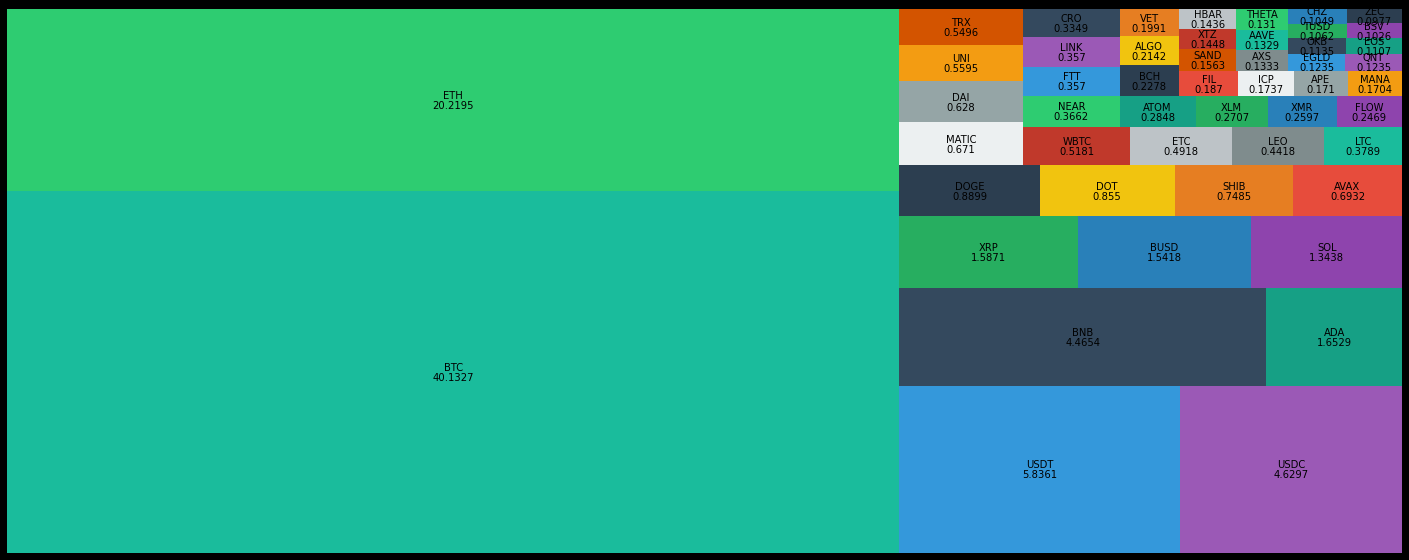

In [5]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
col_name = "quote.USD.market_cap_dominance"
cap_dominance_subset = df.nlargest(50, col_name)
squarify.plot(
  cap_dominance_subset[col_name],
  value=cap_dominance_subset[col_name],
  label=cap_dominance_subset["symbol"],
  color=PALETTE,
  ax=ax,
  text_kwargs={"color": "black"}
)
plt.axis("off")
plt.show()

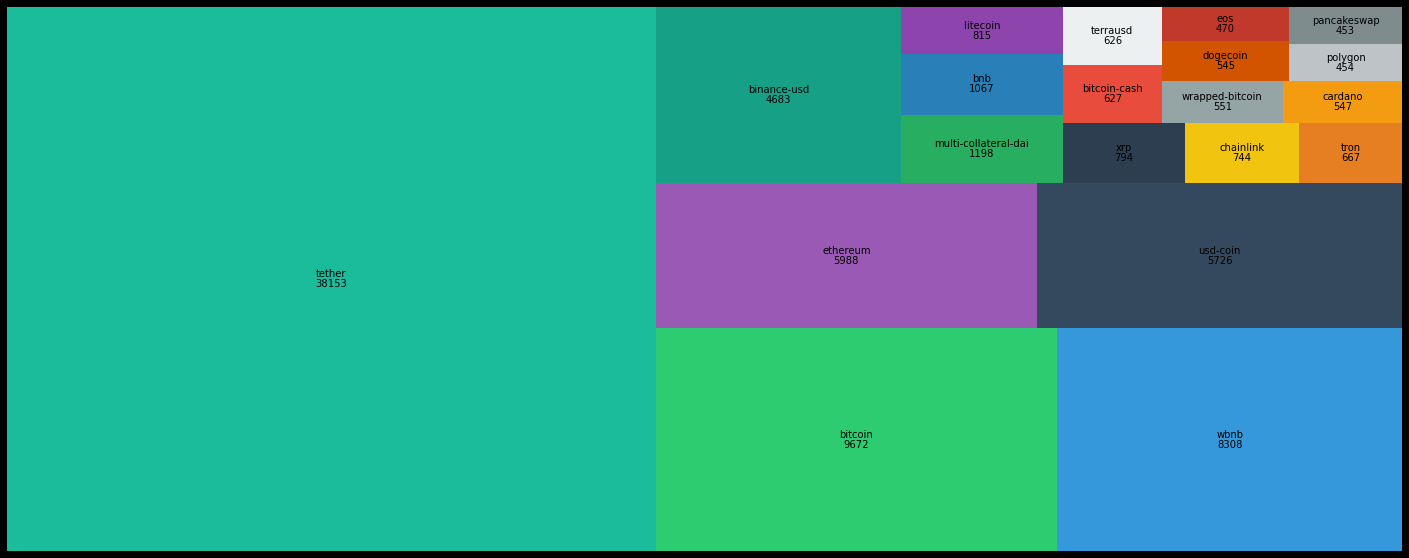

In [6]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
col_name = "num_market_pairs"
num_market_pairs_subset = df.nlargest(20, col_name)
squarify.plot(
  num_market_pairs_subset[col_name],
  value=num_market_pairs_subset[col_name],
  label=num_market_pairs_subset["slug"],
  color=PALETTE,
  ax=ax,
  text_kwargs={"color": "black"}
)
plt.axis("off")
plt.show()

In [7]:
df.loc[:, "percentage"] = df.total_supply / df.max_supply
df["percentage"].round(2)
supply = df[["symbol", "total_supply", "max_supply", "percentage"]]
supply.query("max_supply > 0").sort_values("percentage", ascending=False)

,symbol,total_supply,max_supply,percentage
212,HBTC,3.897049e+04,6.910000e+03,5.639723
412,MNGO,1.000000e+10,5.000000e+09,2.000000
312,SSX,6.000000e+09,5.000000e+09,1.200000
945,DYP,3.000000e+07,2.565153e+07,1.169521
414,ALCX,1.700240e+06,1.562945e+06,1.087844
...,...,...,...,...
637,SAFEMOON,0.000000e+00,1.000000e+15,0.000000
640,LOKA,0.000000e+00,5.000000e+08,0.000000
902,BTRS,0.000000e+00,1.000000e+06,0.000000
419,EXRD,0.000000e+00,4.410000e+09,0.000000
